# Project description

Working with the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms, and historical data on game sales are avaiable from open sources. Its needed to identify patterns that determine wether a game succeeds or not. This will allow to spot potential big winners and plan advertising campaigns.

# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Loading the Data

In [2]:
ds = pd.read_csv('../games.csv')

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
ds.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9302,Gladius,XB,2003.0,Strategy,0.10,0.03,0.00,0.00,79.0,8.5,T
16012,Shin Hisui no Shizuku: Hiiro no Kakera 2 Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
8957,White Knight Chronicles: Origins,PSP,2011.0,Role-Playing,0.00,0.04,0.09,0.02,NaN,NaN,NaN
459,Borderlands 2,X360,2012.0,Shooter,1.89,0.88,0.04,0.25,89.0,8.2,M
2377,Madden NFL 08,Wii,2007.0,Sports,0.80,0.00,0.00,0.07,76.0,6.8,E
7003,The Lord of the Rings: Aragorn's Quest,Wii,2010.0,Action,0.17,0.05,0.00,0.02,58.0,7.8,T
8856,Rocky,XB,2002.0,Fighting,0.11,0.03,0.00,0.01,74.0,7.3,T
12628,Splat Renegade Paintball,XB,2005.0,Sports,0.04,0.01,0.00,0.00,44.0,tbd,T
11970,Magi: The Labyrinth of Beginning,3DS,2013.0,Role-Playing,0.00,0.00,0.07,0.00,NaN,NaN,NaN
7748,Aliens vs Predator,PC,2010.0,Shooter,0.00,0.17,0.00,0.02,68.0,7.4,M


In [5]:
ds.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Preparing the Data

Setting up a copy of the data to work on that

In [6]:
df = ds.copy()

## Making the column names lowercase

In [7]:
columns = [a.lower() for a in df.keys()]
df.columns = columns

In [8]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Changing the columns datatype to the correct type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())

In [11]:
df['year_of_release'] = df['year_of_release'].astype(int)

Changing the year of release column since it makes no sense for it to be a float, and the user score column since all user scores seem to range from 0 to 10. The rest of the columns seem to be of the correct type.

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
df[(df['user_score'] == 'tbd') & (df['year_of_release'] == 2016)].shape


(34, 11)

There seems to be that only 34 games from 2016 have a user score still to be determined. Im thinking they are so because of being recent releases at the moment the data was collected and not enough users had yet given their score. Although years before also have a similar amount of tbd games, only the ones from 2016 will be filled as the mean of the column. The rest will be treated as 0 when dealing with nan values further ahead

In [14]:
not_enough_data_mask = (df['user_score'] == 'tbd') & (df['year_of_release'] == 2016)
df.loc[not_enough_data_mask, 'user_score'] = 11

In [15]:
unpopular_mask = (df['user_score'] == 'tbd') & (df['year_of_release'] < 2016)
df.loc[unpopular_mask, 'user_score'] = 0

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', 11, '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

The user score value tbd (To Be Determined) will be considered as 0. It seems that the low popularity of those games had them unranked by the users. For the 2016 games the user rank will be the average of the column

In [18]:
df.loc[df['user_score']>10, 'user_score'] = df[(df['user_score']<10) & (df['user_score']>0)]['user_score'].median()

## Checking for duplicates

In [19]:
df[df.duplicated(keep='last')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## Dealing with NaN

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


### Name column

In [21]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Dropping the NaN values since those two rows are highly uninformative

In [22]:
df = df.dropna(subset=['name'])

Checking again for NaN

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [24]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,10014.000000
mean,2006.494525,0.263302,0.145045,0.077625,0.047343,68.967679,5.425814
std,5.828405,0.813565,0.503359,0.308871,0.186742,13.938165,3.306888
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,2.800000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,6.900000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


### Critic score column

In [25]:
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())

C:\Users\Tirso\AppData\Local\Temp\ipykernel_8660\3082889487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


All the NaN in the column were filled with the median

### User score column

In [27]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,10014.000000
mean,2006.494525,0.263302,0.145045,0.077625,0.047343,70.010531,5.425814
std,5.828405,0.813565,0.503359,0.308871,0.186742,9.778073,3.306888
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,71.000000,2.800000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,6.900000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,71.000000,8.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [28]:
df['user_score'] = df['user_score'].fillna(df['user_score'].median())

C:\Users\Tirso\AppData\Local\Temp\ipykernel_8660\1931243227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score'].fillna(df['user_score'].median())


All the NaN in the column were filled with the median

### Rating column

In [29]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [30]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


C:\Users\Tirso\AppData\Local\Temp\ipykernel_8660\1026040397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


All the NaN values in the rating column were filled with the mode of the column

## Feature Engineering

### Creating the total sales column

In [32]:
df['total_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']

C:\Users\Tirso\AppData\Local\Temp\ipykernel_8660\1258182972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']


# Analyzing the Data

([<matplotlib.axis.XTick at 0x1f103ca77d0>,
 [Text(1980, 0, '1980'),
  Text(1983, 0, '1983'),
  Text(1986, 0, '1986'),
  Text(1989, 0, '1989'),
  Text(1992, 0, '1992'),
  Text(1995, 0, '1995'),
  Text(1998, 0, '1998'),
  Text(2001, 0, '2001'),
  Text(2004, 0, '2004'),
  Text(2007, 0, '2007'),
  Text(2010, 0, '2010'),
  Text(2013, 0, '2013'),
  Text(2016, 0, '2016')])

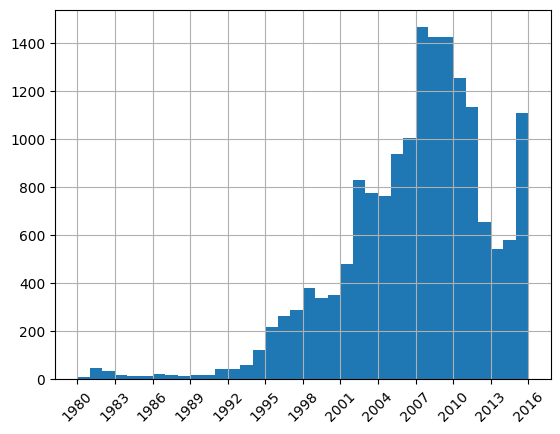

In [33]:
df['year_of_release'].hist(bins=36)
plt.xticks(range(df['year_of_release'].min(), df['year_of_release'].max() + 1, 3), rotation = 45)

The data for the release years seems mostly left skewed, meaning that most games were released after the 2000s. The highest peak can be seen after 2010, which preceded a downfall and then it seems to be going for another rise.

In [34]:
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(4).reset_index()
top_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51


The top 4 best selling platforms are the PS2, Xbox360, PS3 and the Wii.

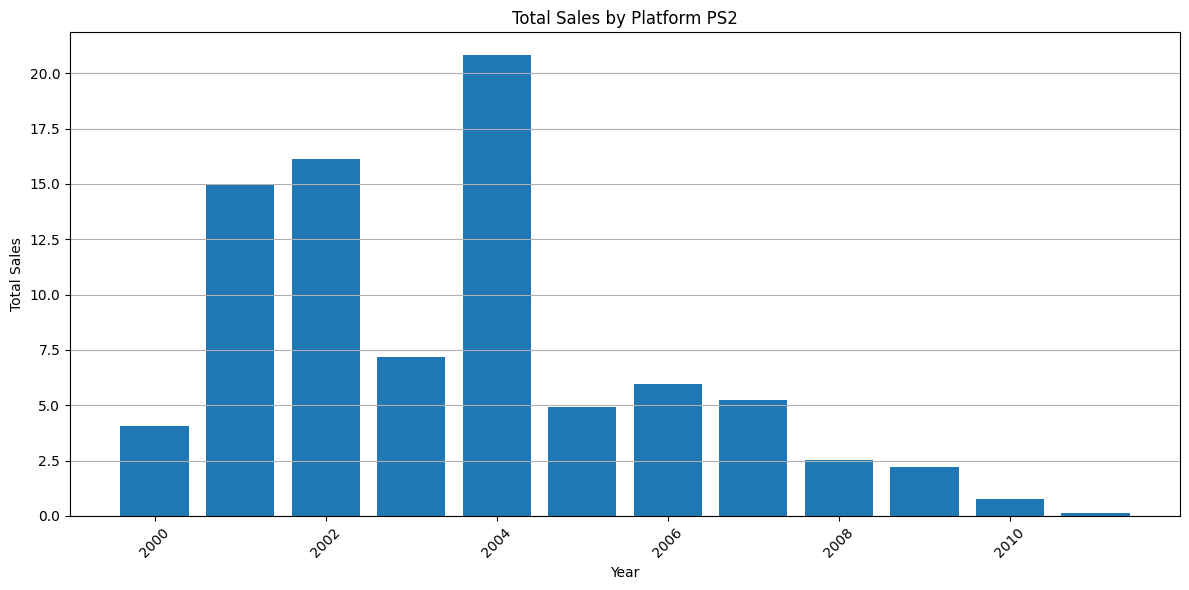

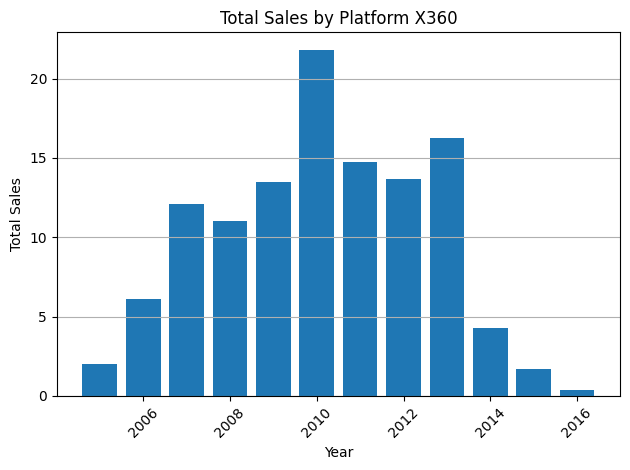

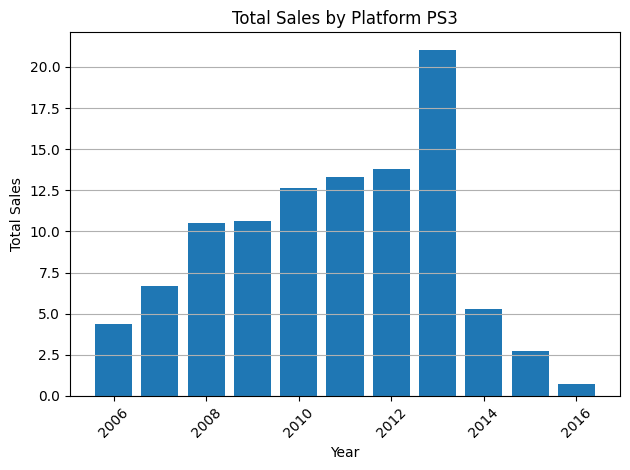

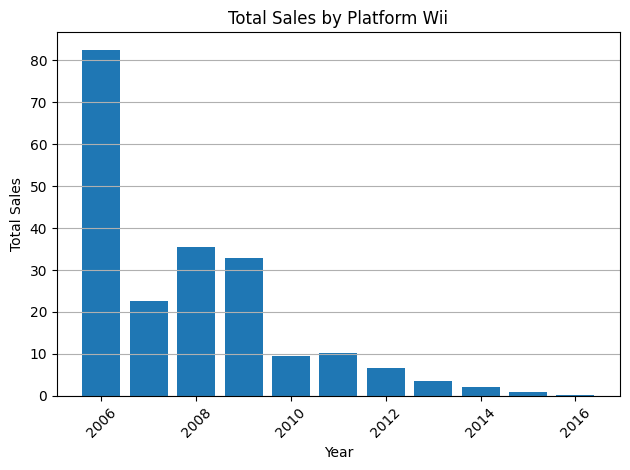

In [35]:
plt.figure(figsize=(12, 6))

for platform in top_platforms['platform']:
    platform_sales = df[df['platform'] == platform]

    plt.bar(platform_sales['year_of_release'], platform_sales['total_sales'], label=platform)
    plt.title(f'Total Sales by Platform {platform}')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()





We can see how the Wii had a huge amount of sales on its release year, then declined a lot yet keeping a considerable amount for the next 4 years but then lowering the amount of sales. Different from the PS3 that had its brightest spot several years after its release, mantaining a similar amount of sales each year. A similar case of the PS3 is the one of the Xbox360.

<font color='red'>I have no idea why the PS2 is the highest seller. Would appreciate some help here.</font>


([<matplotlib.axis.XTick at 0x1f106871910>,
 [Text(1980, 0, '1980'),
  Text(1981, 0, '1981'),
  Text(1982, 0, '1982'),
  Text(1983, 0, '1983'),
  Text(1984, 0, '1984'),
  Text(1985, 0, '1985'),
  Text(1986, 0, '1986'),
  Text(1987, 0, '1987'),
  Text(1988, 0, '1988'),
  Text(1989, 0, '1989'),
  Text(1990, 0, '1990'),
  Text(1991, 0, '1991'),
  Text(1992, 0, '1992'),
  Text(1993, 0, '1993'),
  Text(1994, 0, '1994'),
  Text(1995, 0, '1995'),
  Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016')])

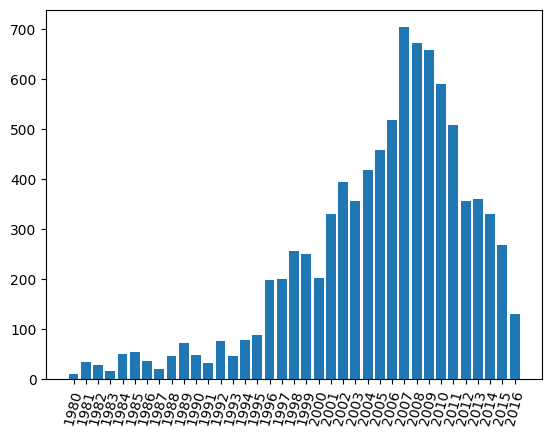

In [36]:
yearly_sales = df.groupby('year_of_release')['total_sales'].sum()
plt.bar(yearly_sales.reset_index()['year_of_release'], yearly_sales.reset_index()['total_sales'])
plt.xticks(range(yearly_sales.index[0], yearly_sales.index[-1]+1), rotation=75)

The sales per year seem to follow the same pattern as the releases, except for the last rise in releases which was not preceeded by an increase in sales, yet it may be due to lack of data being the last year data was recorded.

In [37]:
platform_lifespans = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespans['lifespan'] = platform_lifespans['max'] - platform_lifespans['min']
platform_lifespans = platform_lifespans[platform_lifespans['max']!=2016]
platform_lifespans

,min,max,lifespan
platform,,,
2600,1980,2007,27
3DO,1994,1995,1
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2007,19
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4
GG,1992,1992,0


In [38]:
platform_lifespans['lifespan'].median()

7.5

We usually see that platforms have a 7.5 year lifespan. We disregard the platforms still active in 2016 for that analysis. Before doing so the platform lifespan was 9 years.

In [39]:
all_selling_platforms = df.groupby('platform')['total_sales'].sum().reset_index()
all_selling_platforms['total_sales'].mean()

287.5254838709677

In [40]:
popular_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
popular_platforms = popular_platforms[popular_platforms>all_selling_platforms['total_sales'].mean()]
popular_platforms.reset_index()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05


In [41]:
popular_platform_lifespans = df[df['platform'].isin(popular_platforms.reset_index()['platform'])].groupby('platform')['year_of_release'].agg(['min', 'max'])
popular_platform_lifespans['lifespan'] = popular_platform_lifespans['max'] - popular_platform_lifespans['min']
popular_platform_lifespans = popular_platform_lifespans[popular_platform_lifespans['max']!=2016]
popular_platform_lifespans

,min,max,lifespan
platform,,,
DS,1985,2013,28
GBA,2000,2007,7
PS,1994,2007,13
PS2,2000,2011,11
PSP,2004,2015,11


In [42]:
popular_platform_lifespans['lifespan'].median()

11.0

We also see that popular platforms had a lifespan of 11 years.

In [43]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,6.9,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,6.9,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,6.9,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,6.9,E,0.01


In [44]:
df[(df['year_of_release'] == 2016) & (df['platform'].isin(popular_platforms.reset_index()['platform'])) & (df['total_sales']==0.01)]['platform'].unique()


array(['PS4', 'PS3'], dtype=object)

Platforms that use to sell above average but had close to no sales in 2016 were the PS4 and the PS3.

## Taking a filtered df for the model

Since platforms have a usual 9 year lifespan i should select only the platforms that came up after 2008 but due to lack of platforms im also gonna select the ones from 2008 and 2007.

In [45]:
still_active_platforms = df.groupby('platform')['year_of_release'].min().sort_values(ascending=False).reset_index()
still_active_platforms = still_active_platforms[still_active_platforms['year_of_release']>=2006]['platform']
df_filtered = df[df['platform'].isin(still_active_platforms)]

In [46]:
df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS3,939.65
1,Wii,907.51
2,PS4,314.14
3,3DS,259.00
4,XOne,159.32
5,WiiU,82.19
6,PSV,54.07


For this period out of the selected platforms the PS3 is leading in sales, even thou it had a bad year last year.

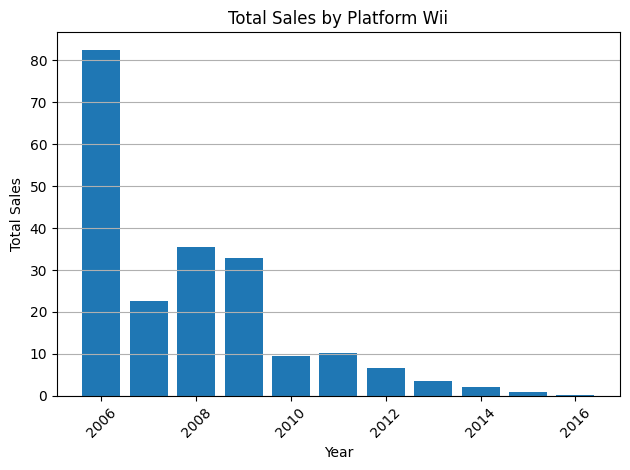

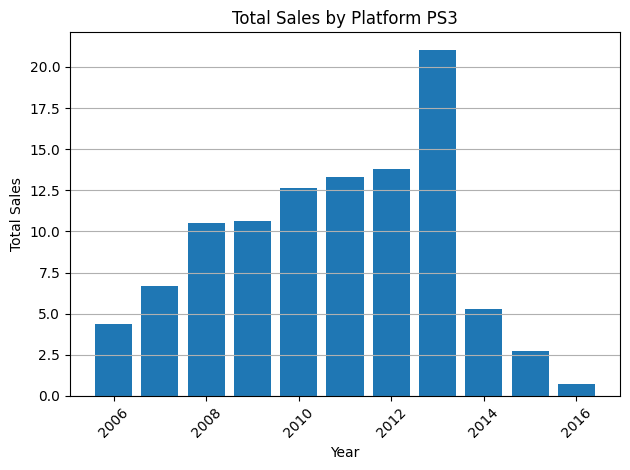

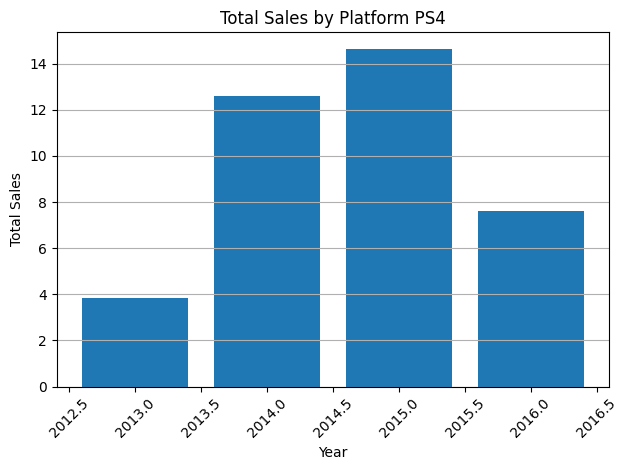

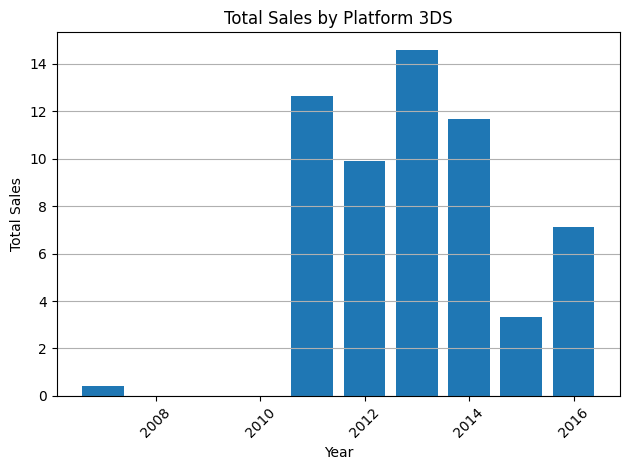

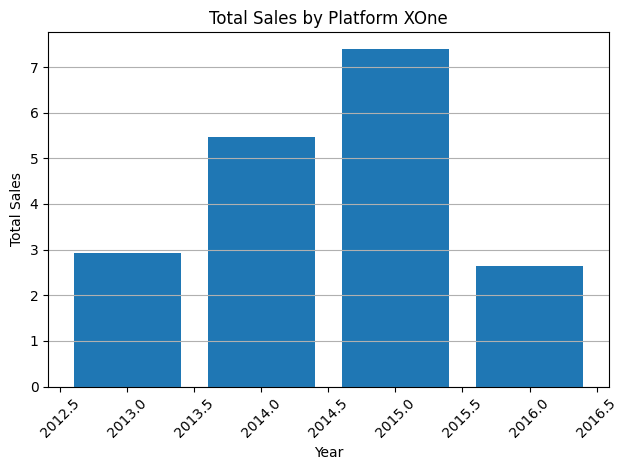

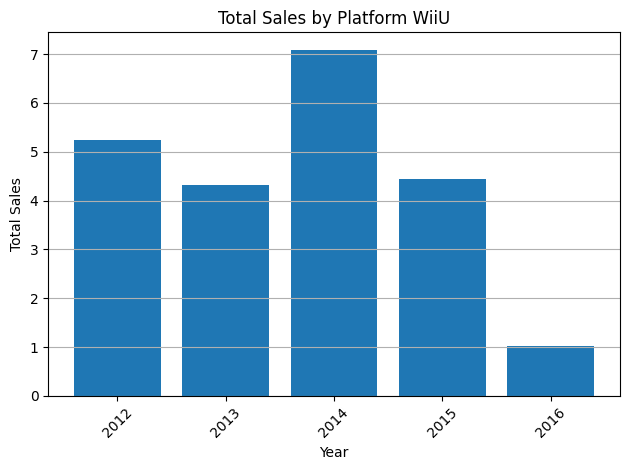

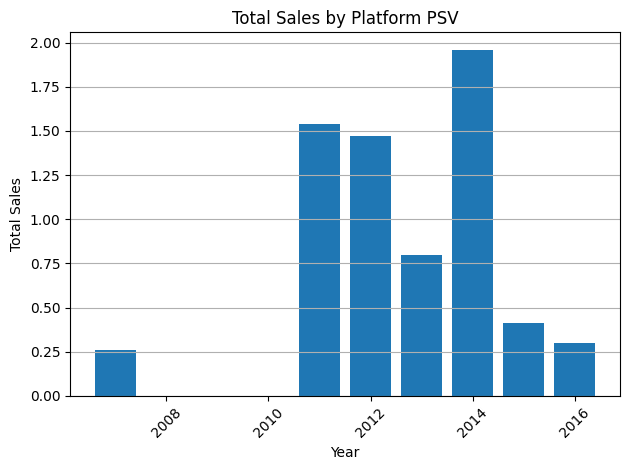

In [47]:
for platform in df_filtered['platform'].unique():
    platform_sales = df_filtered[df_filtered['platform'] == platform]

    plt.bar(platform_sales['year_of_release'], platform_sales['total_sales'], label=platform)
    plt.title(f'Total Sales by Platform {platform}')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


Most of the platforms seem to have been past their prime and going donwhill except for the XboxOne who can still make a comeback after a bad year, the 3DS seems to be recovering after a bad year and could see a spike next year, and the PS4 is holding still a little bit strong and can also see a spike in sales.

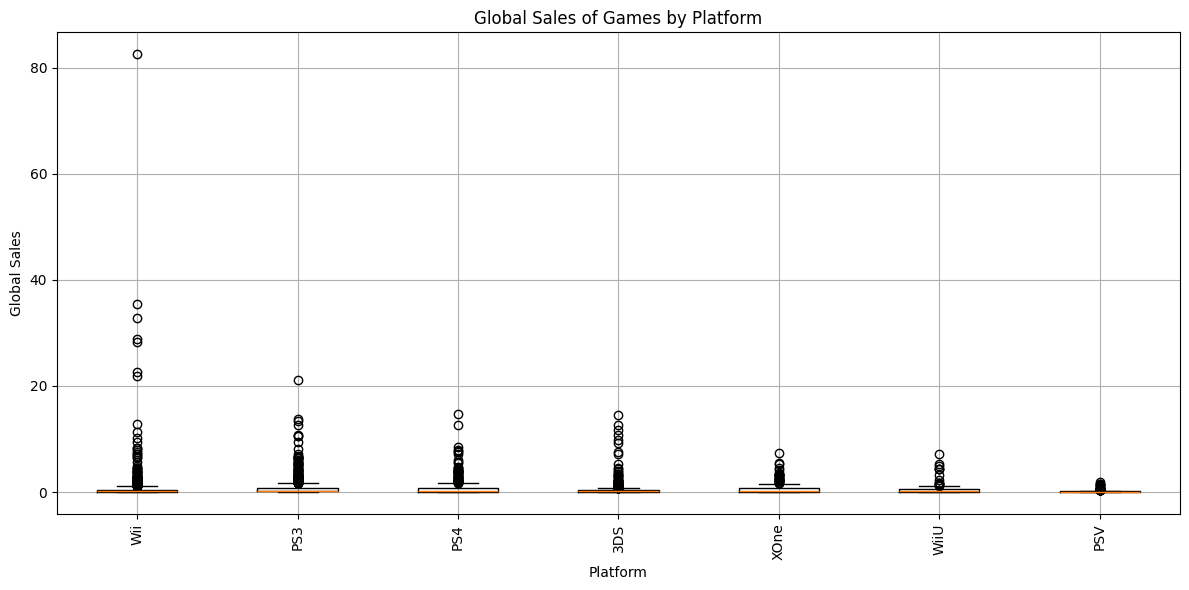

In [48]:
plt.figure(figsize=(12, 6))
plt.boxplot([df_filtered[df_filtered['platform'] == platform]['total_sales'] for platform in df_filtered['platform'].unique()], labels=df_filtered['platform'].unique())
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=90) 
plt.grid(True)
plt.tight_layout()
plt.show()

Its almost impossible to read any data from the boxplot due to many of the datapoints falling outside the top limit.

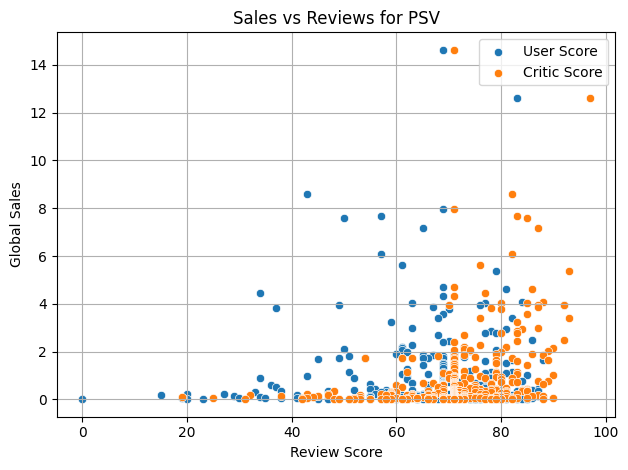

In [49]:
rating_sales = df[df['platform'] == 'PS4'][['user_score', 'critic_score', 'total_sales']]
rating_sales['user_score'] = rating_sales['user_score']*10
sns.scatterplot(x='user_score', y='total_sales', data=rating_sales, label='User Score')

sns.scatterplot(x='critic_score', y='total_sales', data=rating_sales, label='Critic Score')

plt.title(f'Sales vs Reviews for {platform}')
plt.xlabel('Review Score')
plt.ylabel('Global Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that there is not much correlation between the user scores and the sales of a game, yet the critic scores tend to be just a little bit more on the right side. Not a definitive factor by any chance either, but definitely more than the user score.

In [50]:
correlation_user_sales = rating_sales['user_score'].corr(rating_sales['total_sales'])
correlation_critic_sales = rating_sales['critic_score'].corr(rating_sales['total_sales'])

print(f"Correlation between user score and sales: {correlation_user_sales:.2f}")
print(f"Correlation between critic score and sales: {correlation_critic_sales:.2f}")

Correlation between user score and sales: -0.03
Correlation between critic score and sales: 0.34


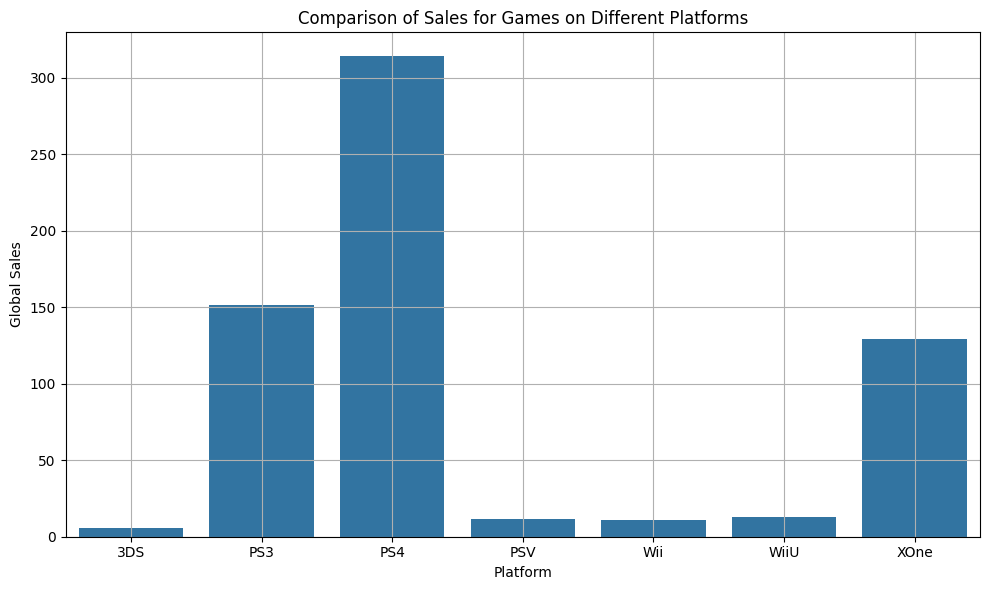

In [51]:
ps4_games = df_filtered[df_filtered['platform'] == 'PS4'][['name', 'total_sales']]
same_games = df_filtered[df_filtered['name'].isin(ps4_games['name'])]
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='total_sales', data=same_games.groupby('platform')['total_sales'].sum().reset_index())
plt.title('Comparison of Sales for Games on Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that games avaiable on a PS4 also sell very well in PS3 and in XboxOne. Not a big surprise since they are the most similar consoles, and PS3 a little bit ahead of the XboxOne, maybe because of company exclusives not avaiable to the other company.

In [52]:
df_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

,genre,total_sales
0,Action,643.79
1,Sports,518.19
2,Shooter,380.68
3,Misc,306.57
4,Role-Playing,226.49
5,Platform,183.96
6,Racing,179.56
7,Fighting,105.05
8,Simulation,75.93
9,Adventure,58.06


Giving a broad generalization it can be seen as the most mainstream and easily consumable genres as action, sports or shooter take the most sales, while the more niche games like strategy or puzzle take a dive. It could also be due to the fact that this games dont have a big take off in most consoles, since they are genres more thought for PCs and such.

# Creating user profile for each region

In [53]:
df_filtered.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
platform,,,
3DS,83.49,61.48,100.67
PS3,393.49,330.29,80.19
PS4,108.74,141.09,15.96
PSV,12.58,13.12,21.91
Wii,496.90,262.21,69.33
WiiU,38.10,25.13,13.01
XOne,93.12,51.59,0.34


In [54]:
na_platforms = df_filtered.groupby('platform')['na_sales'].sum().reset_index()
region_sales = df_filtered.groupby('platform')['na_sales'].sum().sum()
na_platforms['market_share'] = na_platforms['na_sales']/region_sales*100
na_platforms.sort_values(ascending=False, by='na_sales').head()

,platform,na_sales,market_share
4,Wii,496.90,40.516299
1,PS3,393.49,32.084441
2,PS4,108.74,8.866457
6,XOne,93.12,7.592831
0,3DS,83.49,6.807619


In [55]:
eu_platforms = df_filtered.groupby('platform')['eu_sales'].sum().reset_index()
region_sales = df_filtered.groupby('platform')['eu_sales'].sum().sum()
eu_platforms['market_share'] = eu_platforms['eu_sales']/region_sales*100
eu_platforms.sort_values(ascending=False, by='eu_sales').head()

,platform,eu_sales,market_share
1,PS3,330.29,37.324700
4,Wii,262.21,29.631262
2,PS4,141.09,15.943994
0,3DS,61.48,6.947599
6,XOne,51.59,5.829971


In [56]:
jp_platforms = df_filtered.groupby('platform')['jp_sales'].sum().reset_index()
region_sales = df_filtered.groupby('platform')['jp_sales'].sum().sum()
jp_platforms['market_share'] = jp_platforms['jp_sales']/region_sales*100
jp_platforms.sort_values(ascending=False, by='jp_sales').head()

,platform,jp_sales,market_share
0,3DS,100.67,33.399688
1,PS3,80.19,26.604957
4,Wii,69.33,23.001891
3,PSV,21.91,7.269168
2,PS4,15.96,5.295113


We can see the Wii and the PS3 taking turns overshadowing all other platforms in most markets, except in Japan where the 3DS took the lead.

In [57]:
df_filtered.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()


,na_sales,eu_sales,jp_sales
genre,,,
Action,276.96,216.73,71.11
Adventure,24.71,17.70,9.42
Fighting,50.75,26.88,15.90
Misc,158.28,92.48,26.59
Platform,87.51,56.52,22.56
Puzzle,11.48,6.17,3.67
Racing,72.41,72.89,11.84
Role-Playing,77.96,52.72,76.77
Shooter,174.25,139.89,14.40


In [58]:
jp_genres = df_filtered.groupby('genre')['jp_sales'].sum().reset_index()
region_sales = df_filtered.groupby('genre')['jp_sales'].sum().sum()
jp_genres['market_share'] = jp_genres['jp_sales']/region_sales*100
jp_genres.sort_values(ascending=False, by='jp_sales').head()

,genre,jp_sales,market_share
7,Role-Playing,76.77,25.470290
0,Action,71.11,23.592449
10,Sports,30.77,10.208686
3,Misc,26.59,8.821871
4,Platform,22.56,7.484821


In [59]:
eu_genres = df_filtered.groupby('genre')['eu_sales'].sum().reset_index()
region_sales = df_filtered.groupby('genre')['eu_sales'].sum().sum()
eu_genres['market_share'] = eu_genres['eu_sales']/region_sales*100
eu_genres.sort_values(ascending=False, by='eu_sales').head()

,genre,eu_sales,market_share
0,Action,216.73,24.491756
10,Sports,179.65,20.301500
8,Shooter,139.89,15.808387
3,Misc,92.48,10.450780
6,Racing,72.89,8.236996


In [60]:
na_genres = df_filtered.groupby('genre')['na_sales'].sum().reset_index()
region_sales = df_filtered.groupby('genre')['na_sales'].sum().sum()
na_genres['market_share'] = na_genres['na_sales']/region_sales*100
na_genres.sort_values(ascending=False, by='na_sales').head()

,genre,na_sales,market_share
0,Action,276.96,22.582802
10,Sports,250.31,20.409811
8,Shooter,174.25,14.208020
3,Misc,158.28,12.905856
4,Platform,87.51,7.135402


We can see Action, Sports and Shooter games taking an ample lead in every zone except in Japan where Shooters disappear from the top 5 and the number 1 becomes role-playing games.

In [61]:
df_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01


In [62]:
sales_by_region_esrb=df_filtered.groupby('rating')[['na_sales', 'jp_sales', 'eu_sales']].sum()
sales_by_region_esrb['total_sales'] = sales_by_region_esrb['na_sales'] + sales_by_region_esrb['eu_sales'] + sales_by_region_esrb['jp_sales']
sales_by_region_esrb

,na_sales,jp_sales,eu_sales,total_sales
rating,,,,
E,579.24,203.12,424.22,1206.58
E10+,173.05,13.41,104.98,291.44
EC,0.62,0.00,0.00,0.62
M,263.60,34.92,226.85,525.37
T,209.91,49.96,128.86,388.73


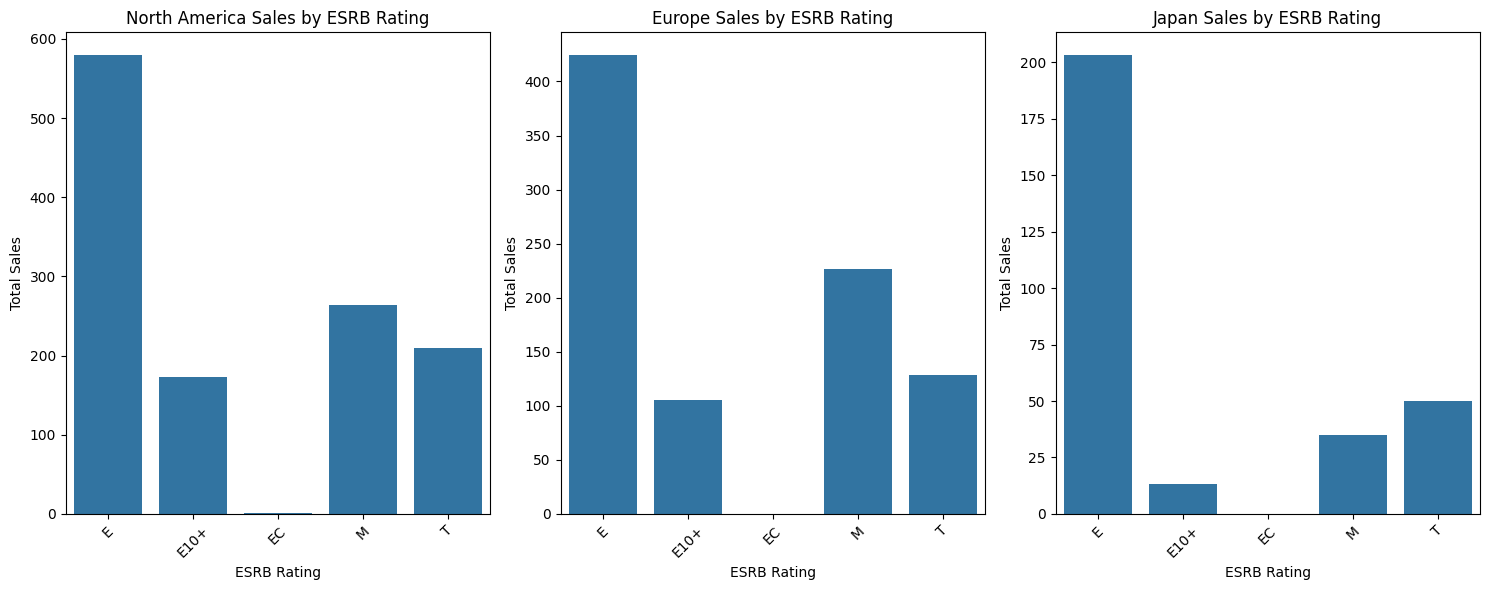

In [63]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='rating', y='na_sales', data=sales_by_region_esrb)
plt.title('North America Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='rating', y='eu_sales', data=sales_by_region_esrb)
plt.title('Europe Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x='rating', y='jp_sales', data=sales_by_region_esrb)
plt.title('Japan Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


When dividing the game sales by region and rating we can see always the games labeled as for everyone being the most populars, and although North America and Europe are very similar acorss all ratings, Japan seems to prefer teen videogames rather than mature, which is the case in the other two. Also over 10 seems to be kind of unpopular in Japan. Is the least popular rating in Europe and North America but its a lot less in Japan. 

# Testing hypothesis

## Average user ratings of the Xbox One and PC platforms are the same

In [66]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,6.9,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,6.9,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,6.9,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,6.9,E,0.01


In [67]:
xbox_ratings = df[df['platform'] == 'XOne']['user_score']
xbox_ratings

99       6.9
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    6.9
16660    6.7
16672    7.5
Name: user_score, Length: 247, dtype: float64

In [68]:
pc_ratings = df[df['platform'] == 'PC']['user_score']
pc_ratings

85       7.6
138      7.3
192      4.0
195      6.9
218      8.2
        ... 
16690    6.9
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 974, dtype: float64

In [69]:
t_stat, p_value = stats.ttest_ind(xbox_ratings, pc_ratings, equal_var=False)

alpha = 0.05
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to conclude that the average user ratings of the Xbox One and PC platforms are different.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average user ratings of the Xbox One and PC platforms are different.")


T-statistic: -1.2642
P-value: 0.2067
Fail to reject the null hypothesis. There is not enough evidence to conclude that the average user ratings of the Xbox One and PC platforms are different.


**Null Hypothesis (H0):** *The average user ratings of the Xbox One and PC platforms are equal.*

We set up the null hypothesis assuming that there is no difference in the average user ratings between the Xbox One and PC platforms. This is the default position that we aim to test.


**Alternative Hypothesis (H1):** *The average user ratings of the Xbox One and PC platforms are not equal.*

The alternative hypothesis suggests that there is a difference in the average user ratings between the Xbox One and PC platforms. This is what we want to find evidence for.

**Significance Level:**

We chose a significance level of 0.05 because it is a common choice in statistical hypothesis testing and provides a balance between Type I and Type II errors. It's a widely accepted convention in many fields of research.